# Customer Segmentation Project

This project is to analyze customer data to segment them based on purchasing behavior and demographics using clustering techniques. The outcome will be distinct customer profiles that can be used to reimagine marketing strategies. 

+ Tools and Technologies:  Python, clustering algorithms, data preprocessing, data visualization, and Scikit-Learn.

+ Dataset: https://archive.ics.uci.edu/dataset/292/wholesale+customers `Wholesale Customers datase` 

## Load dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [60]:
# Load dataset
df = pd.read_csv(r"Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Drop columns that are not needed

In [61]:
data = df.iloc[:,2:]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [62]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [63]:
# Summary statistics
print("Summary Statistics:\n", data.describe())

Summary Statistics:
                Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


## Exploratory Data Analysis (EDA)

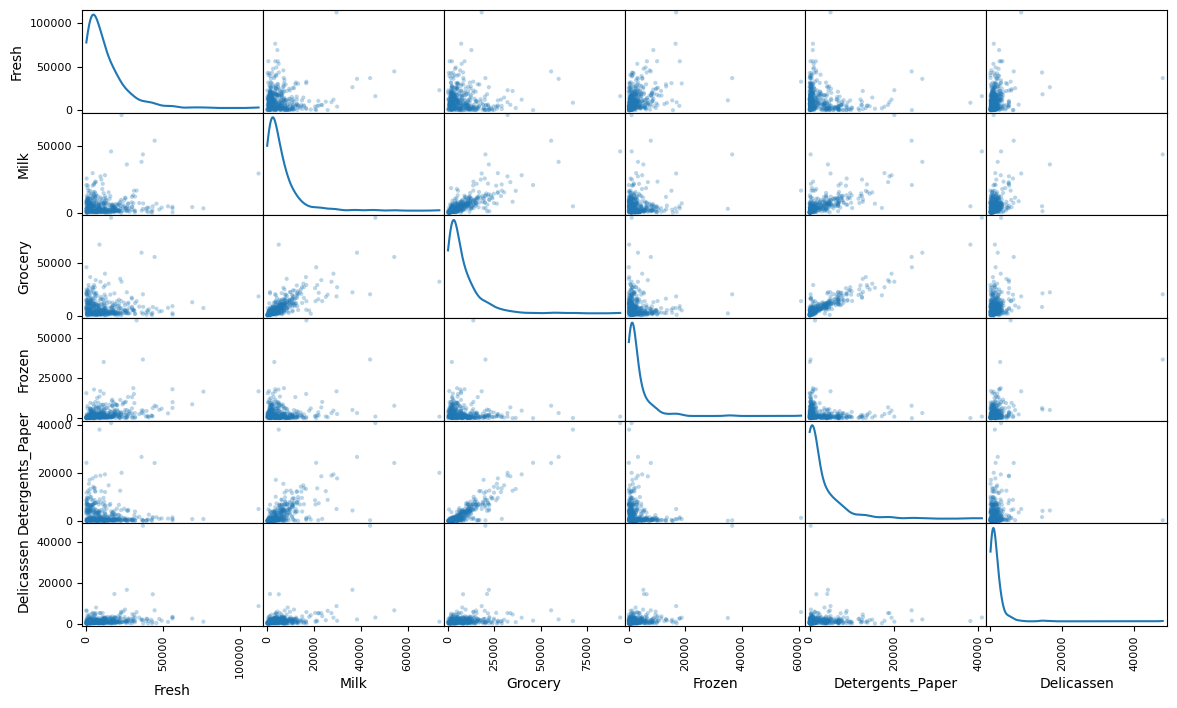

In [64]:
# Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.3, figsize=(14, 8), diagonal='kde')
plt.show()

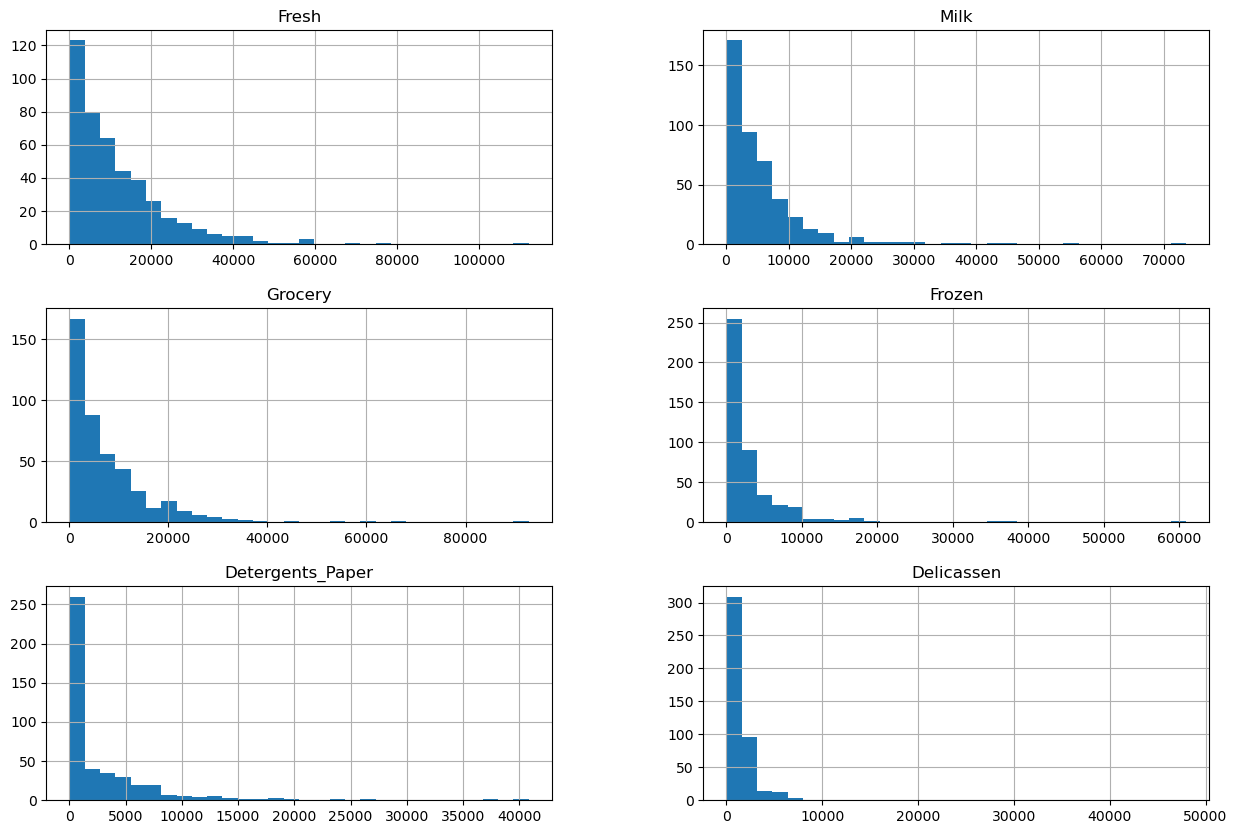

In [65]:
# Visualize distributions
data.hist(bins=30, figsize=(15, 10))
plt.show()

### Identify Patterns and Relationships

#### Pair plot

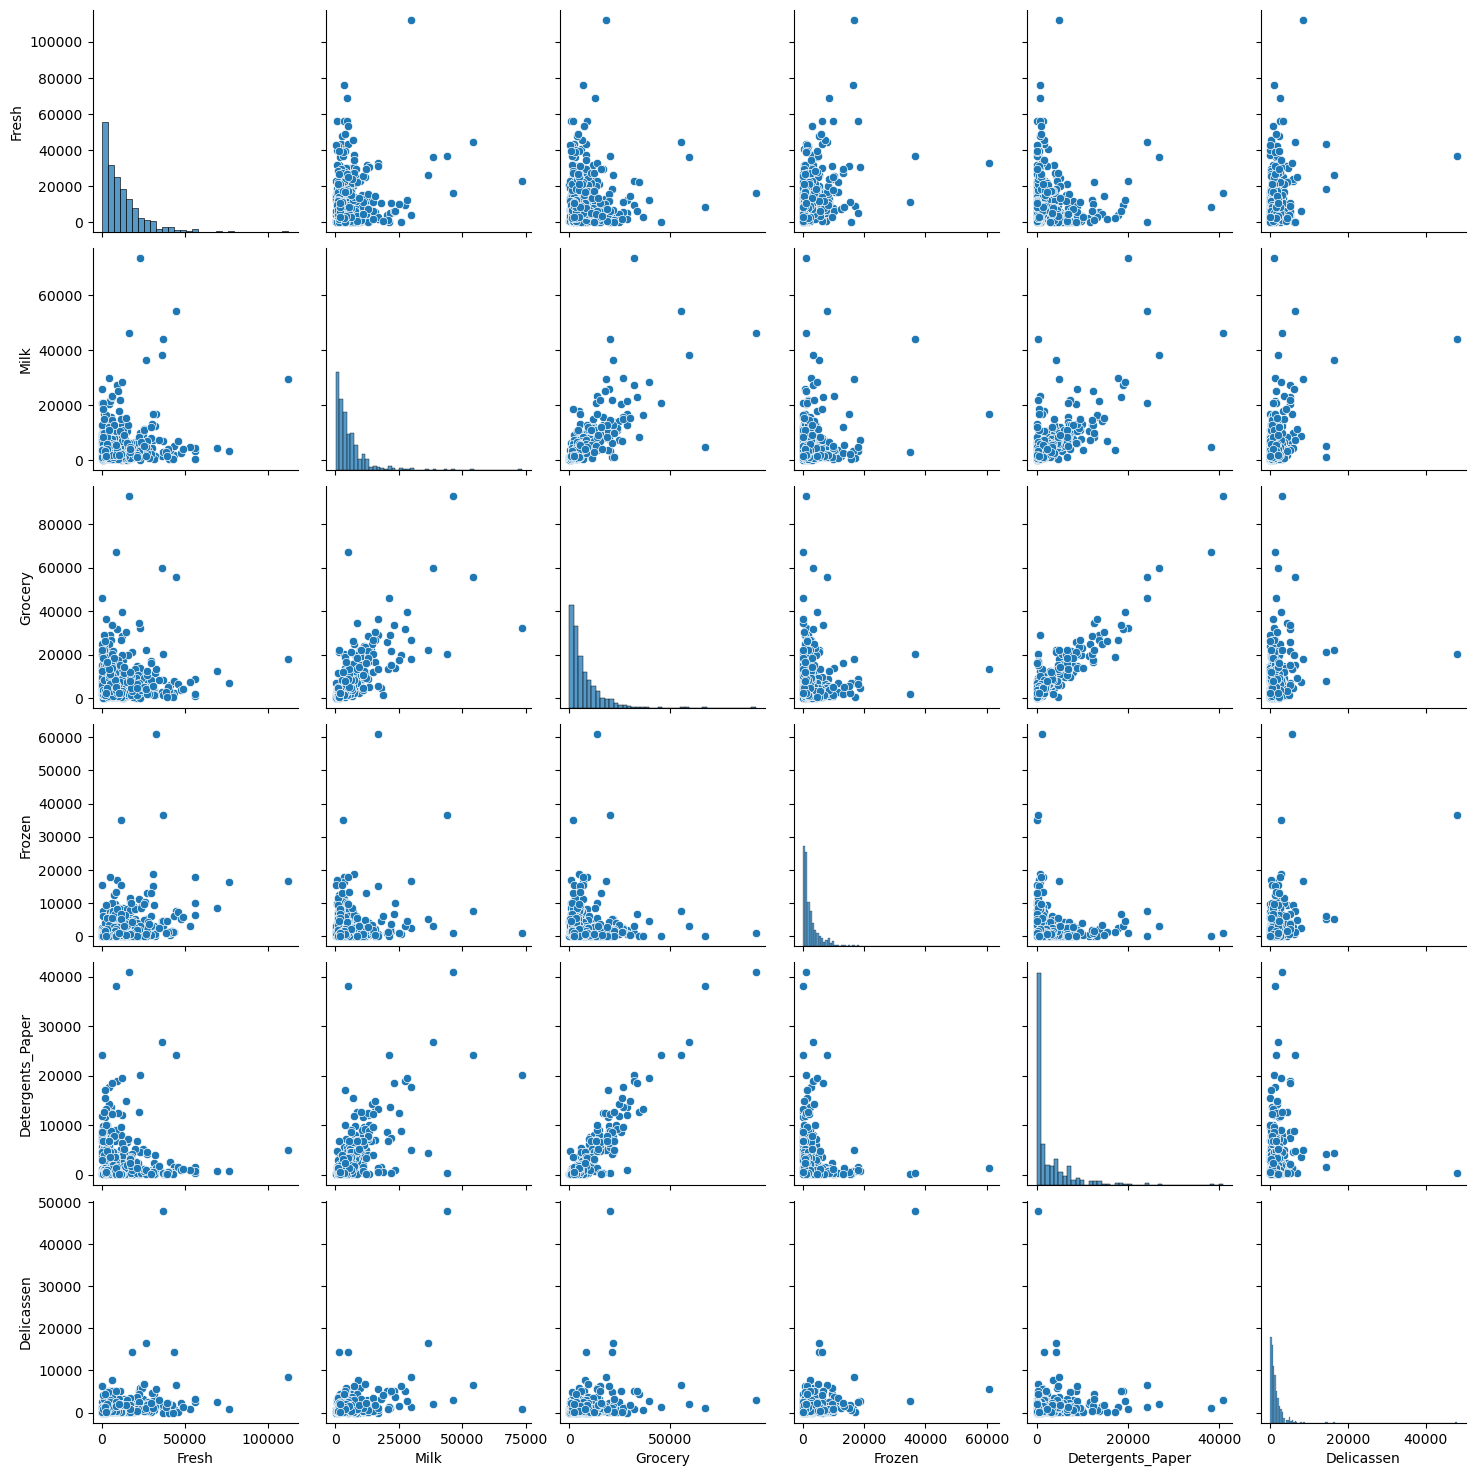

In [66]:
# Pair plot
sns.pairplot(data)
plt.show()

#### Correlation heatmap

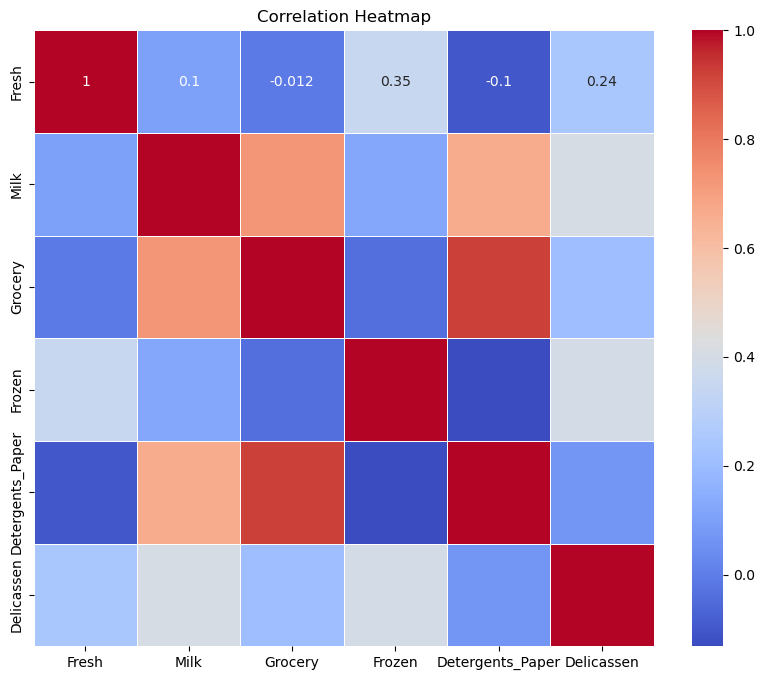

In [67]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Key Points of the Heatmap:
#### 1. Correlation Coefficient:

+ The correlation coefficient (r) ranges from -1 to 1.
+ +1 indicates a perfect positive correlation (as one feature increases, the other feature also increases).
+ -1 indicates a perfect negative correlation (as one feature increases, the other feature decreases).
+ 0 indicates no correlation (the features are independent).

#### 2. Color Scale

+ Red colors indicate positive correlations.
+ Blue colors indicate negative correlations.
+ The intensity of the color represents the strength of the correlation.

#### Interpretation 
+ *Fresh*: Weak correlations with other features
+ *Milk*: Customers who spend more on milk also tend to spend more on groceries and detergents/paper.
+ *Grocery*: Customers who spend more on groceries also tend to spend more on detergents/paper.
+ *Frozen*: No significant positive or negative correlations with other features.
+ *Detergents_Paper*: Strong correlation with Grocery and moderate positive correlation with Milk.

# Clustering

## Perform Elbow Method to find optimal number of clusters

In [87]:
# Based on the heatmap,'Detergents_Paper' was removed due to its high correlation with 'Grocery'
data_reduced = data.drop(columns=['Detergents_Paper'])

In [69]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_reduced)

In [70]:
# Elbow Method to find the optimal number of clusters
wcss = []  # Within Cluster Sum of Squares

In [71]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

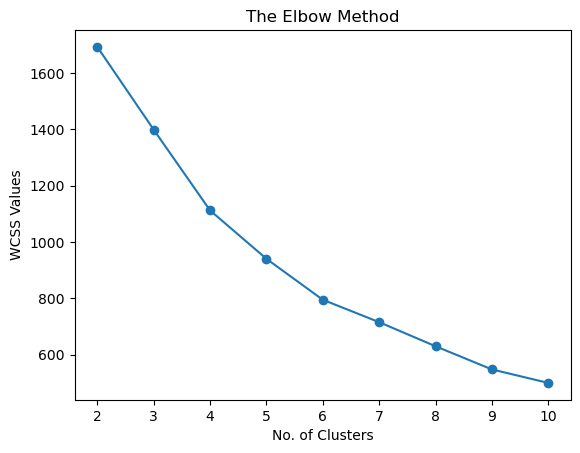

In [72]:
plt.plot(range(2, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Values')
plt.show()

## Training Model with K-Means Algorithm (Unsupervised Learning)

In [73]:
# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 4

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

+ Evaluate using Silhouette score and other metrics

In [74]:
# Silhouette score
score = silhouette_score(data_scaled, data['Cluster'])
print('Silhouette Score:', score)

Silhouette Score: 0.4243306948509836


# Customer Profiling

## Interpret Cluster Results

+ Analyze the characteristics of each cluster.

In [75]:
# Cluster centers
centers = kmeans.cluster_centers_
print(centers)

[[-0.27516786  1.95038667  2.21427843 -0.18017562  0.3407389 ]
 [ 1.599589   -0.12182463 -0.22584555  1.0350249   0.3385074 ]
 [-0.30154467 -0.24621358 -0.24738931 -0.21199616 -0.16508757]
 [ 1.96681731  5.17550306  1.28721685  6.90059988 16.47844745]]


In [78]:
# Define the feature names
features = data_reduced.columns

# Convert the cluster centers into a DataFrame for better visualization
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(centers), columns=features)
print("Cluster Centers:\n", cluster_centers_df)

# Create descriptive profiles based on cluster characteristics
for i, center in enumerate(cluster_centers_df.values):
    print(f"\nCluster {i} Profile:")
    print("----------------------")
    for j, col in enumerate(features):
        print(f"{col}: {center[j]:.2f}")

Cluster Centers:
           Fresh          Milk       Grocery        Frozen    Delicassen
0   8524.116279  20174.488372  28970.000000   2198.232558   2484.697674
1  32207.823529   4898.176471   5807.470588   8090.926471   2478.411765
2   8190.899390   3981.182927   5602.969512   2043.929878   1059.835366
3  36847.000000  43950.000000  20170.000000  36534.000000  47943.000000

Cluster 0 Profile:
----------------------
Fresh: 8524.12
Milk: 20174.49
Grocery: 28970.00
Frozen: 2198.23
Delicassen: 2484.70

Cluster 1 Profile:
----------------------
Fresh: 32207.82
Milk: 4898.18
Grocery: 5807.47
Frozen: 8090.93
Delicassen: 2478.41

Cluster 2 Profile:
----------------------
Fresh: 8190.90
Milk: 3981.18
Grocery: 5602.97
Frozen: 2043.93
Delicassen: 1059.84

Cluster 3 Profile:
----------------------
Fresh: 36847.00
Milk: 43950.00
Grocery: 20170.00
Frozen: 36534.00
Delicassen: 47943.00





### Data Analysis Conclusion

+ Cluster 0 Profile: This cluster represents customers with moderate spending on fresh, milk, and frozen products, with lower spending on detergents/paper and delicatessen items.

+ Cluster 1 Profile: This cluster represents customers with very high spending across all categories, indicating possibly wholesale buyers or large institutions.

+ Cluster 2 Profile: This cluster represents customers with high spending on fresh products and moderate spending on other categories.

+ Cluster 3 Profile: This cluster represents customers with very high spending on milk and frozen products, indicating a preference for these categories.

+ Cluster 4 Profile: This cluster represents customers with extremely high spending on milk, frozen, and delicatessen items, likely indicating a specific business type or market segment.


By analyzing the cluster centers, we can create meaningful customer profiles that describe the typical behavior of customers within each cluster. These profiles can then be used to tailor marketing strategies, identify target segments, and improve customer relationship management.

You can now proceed to develop marketing strategies based on these customer profiles and recommend actionable insights for the business.

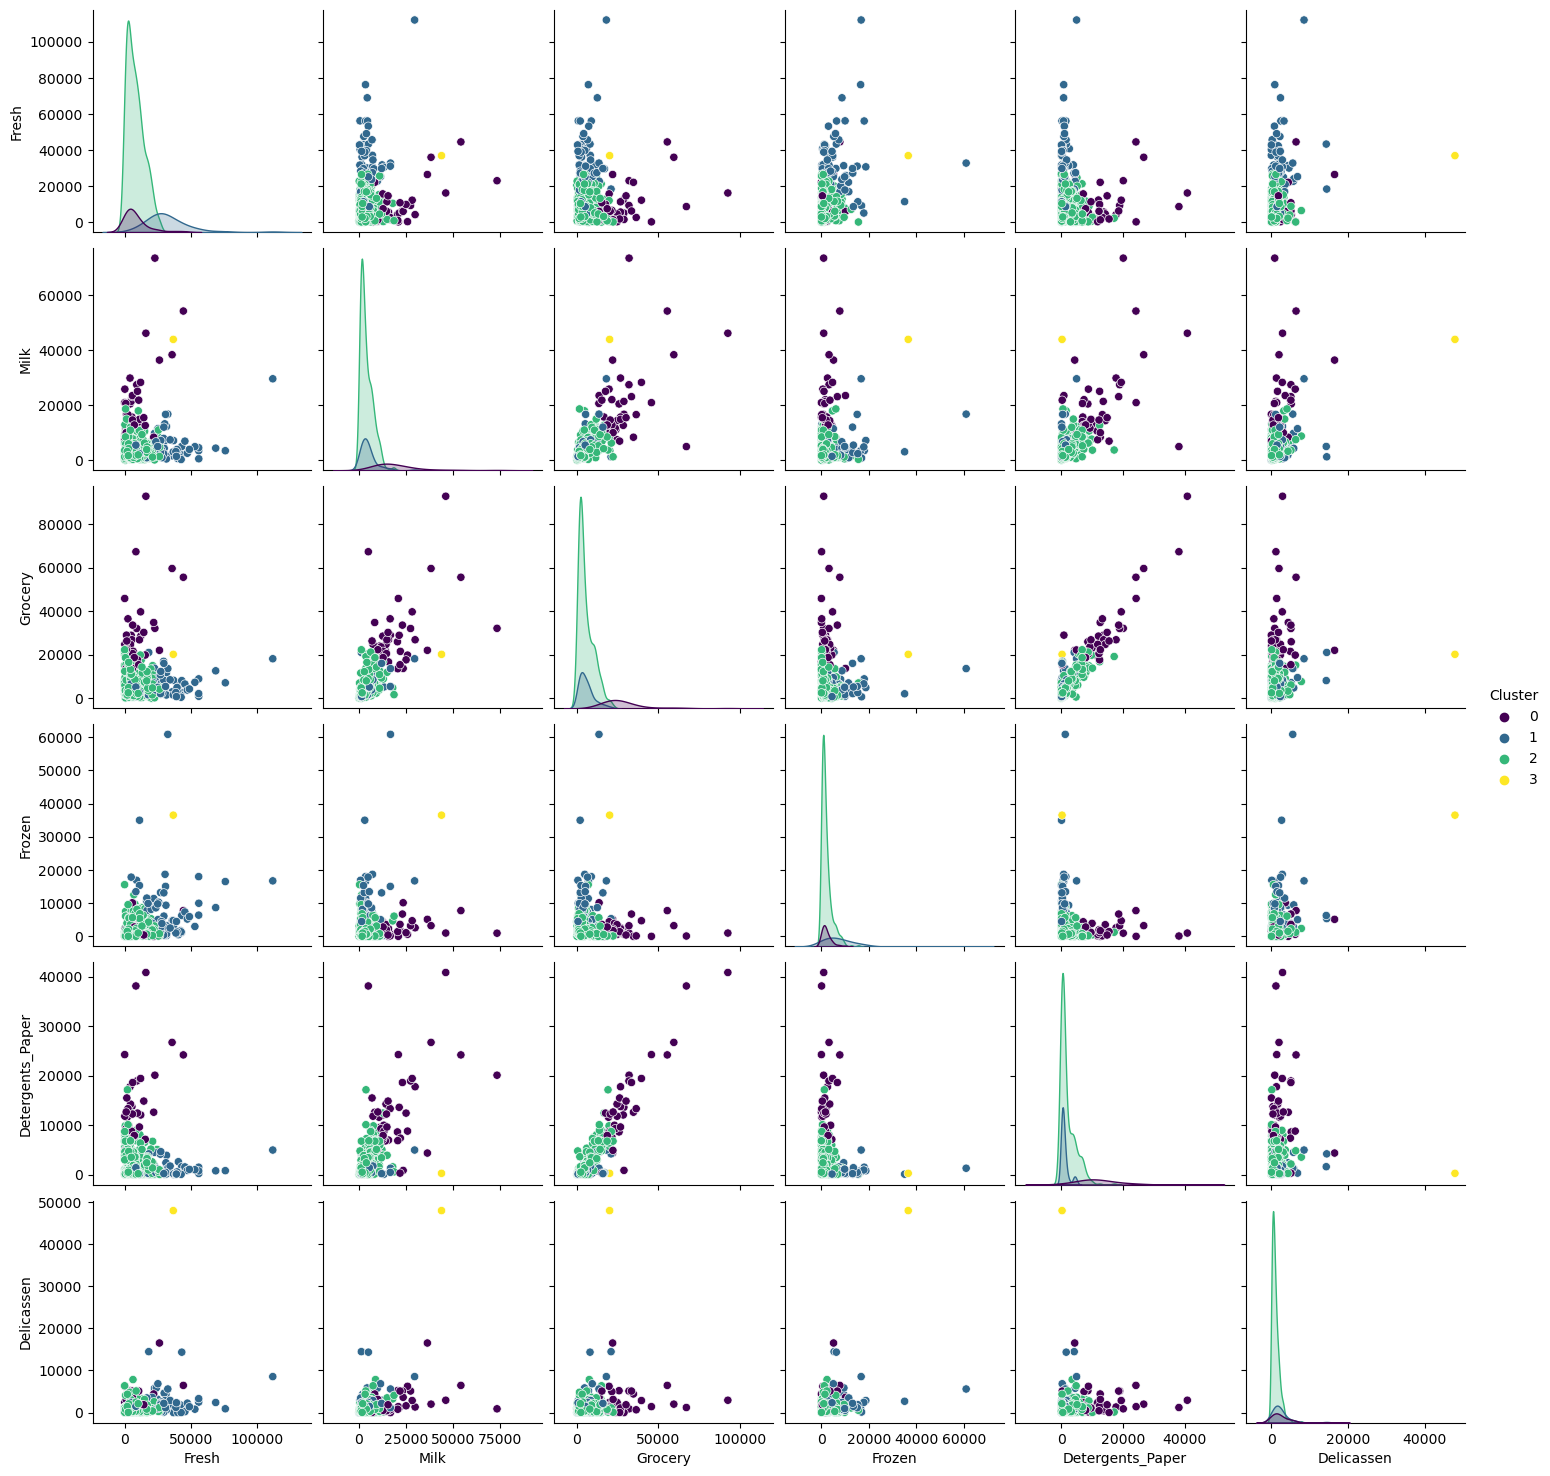

In [80]:
# Pair plot colored by clusters
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

+ These insights can be useful for tailoring marketing strategies to each customer segment, such as offering special deals to high spenders (Cluster 1) or identifying growth opportunities among mid-range spenders (Cluster 2)
  

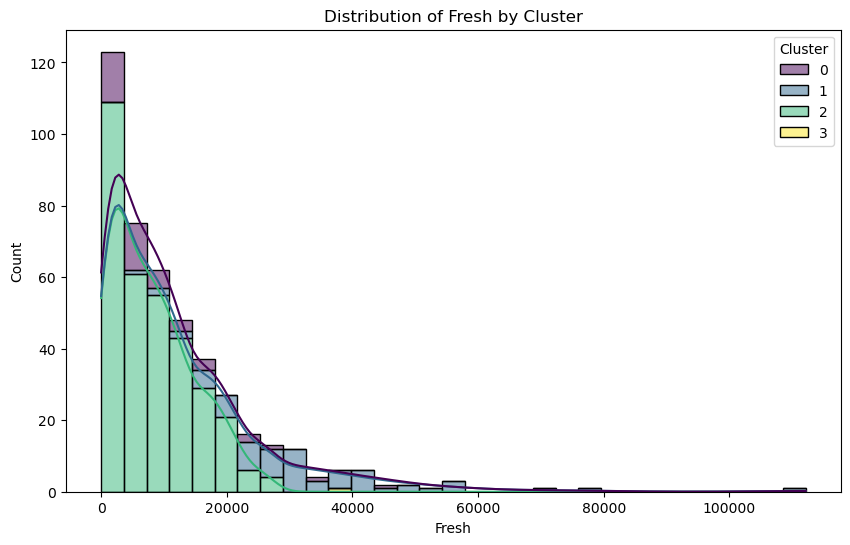

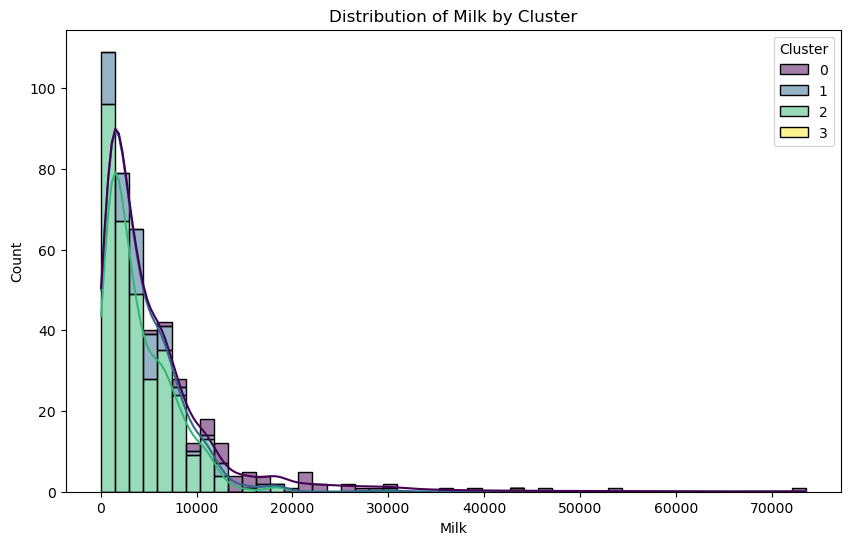

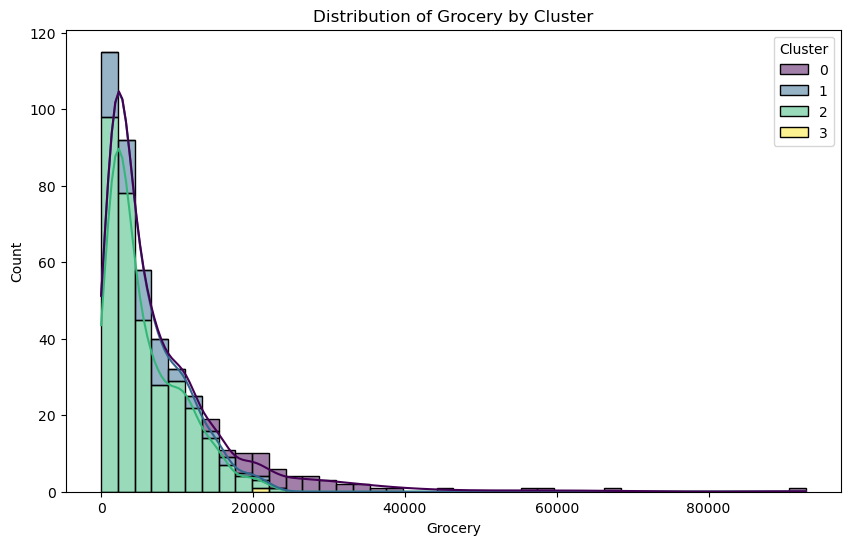

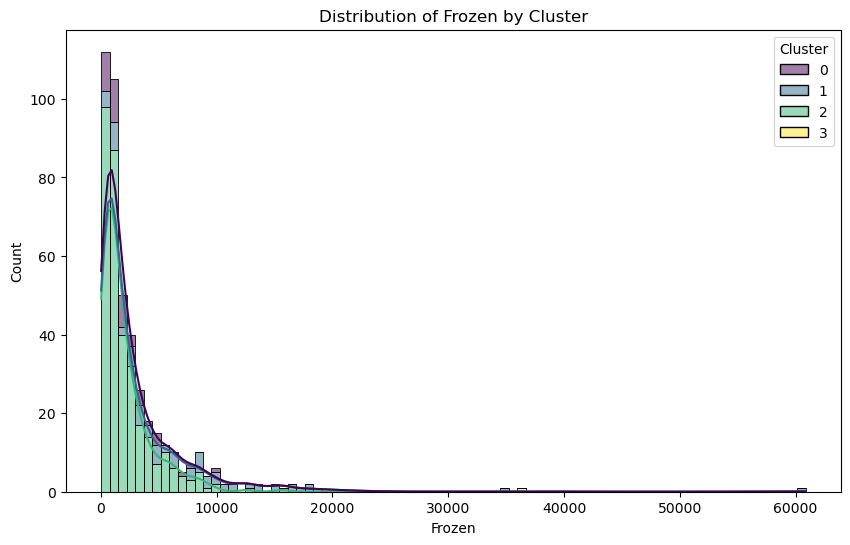

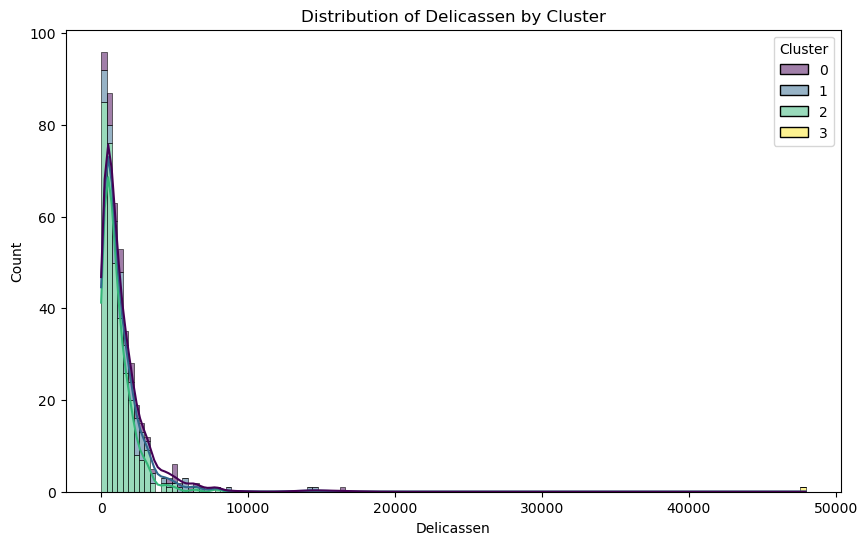

In [81]:
# Visualize feature distributions within each cluster
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Cluster', kde=True, palette='viridis', multiple='stack')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

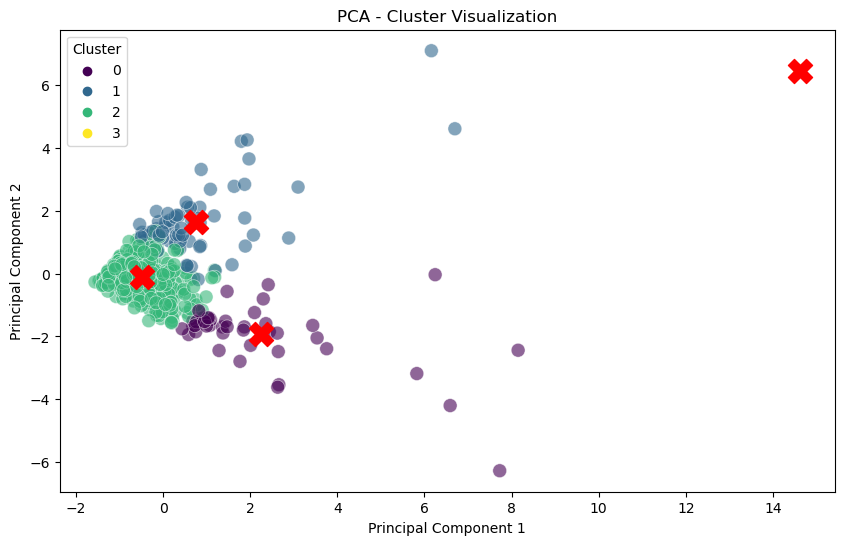

In [82]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]

# Scatter plot with PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=data, s=100, alpha=0.6, edgecolor='w', linewidth=0.5)
plt.title('PCA - Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Overlay cluster centroids
centroids_pca = pca.transform(centers)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X')
plt.show()

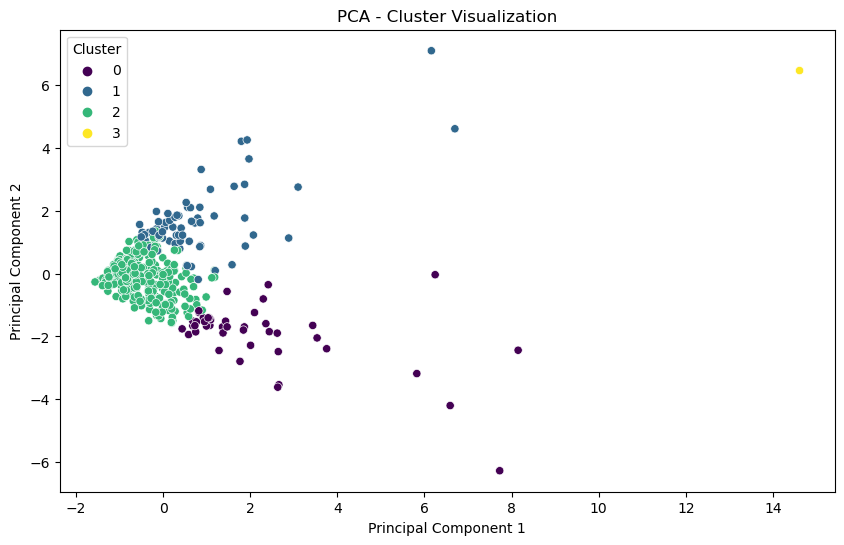

In [86]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])
# Scatter plot with PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=data)
plt.title('PCA - Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()